<a href="https://colab.research.google.com/github/mohitphulsunge/DataScience-MachineLearning/blob/main/EDA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,6)})

Import the dataset

In [ ]:
control = pd.read_csv("Control.csv")
customer = pd.read_csv("Customer.csv")
treatment = pd.read_csv("Treatment.csv")
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 30)

Print data schema, summary, #columns and #rows

In [ ]:
treatment.describe(include='all')

In [ ]:
control_customers = control["EmailAddress"].isin(customer["EmailAddress"])
treatment_customers = treatment["EmailAddress"].isin(customer["EmailAddress"])
control["isCustomer"] = control_customers
treatment["isCustomer"] = treatment_customers
control.head()

-----Treatment-----
False    98.581419
True      1.418581
Name: EmailAddress, dtype: float64
-------------------
-----Control-----
False    98.742515
True      1.257485
Name: EmailAddress, dtype: float64
-----------------


([<matplotlib.patches.Wedge at 0x7ff22def0d90>,
 [Text(-1.0991417542068271, 0.04344426497409028, ''),
  Text(1.0991417540797164, -0.043444268189999434, '')],
 [Text(-0.5995318659309965, 0.023696871804049238, '98.74%'),
  Text(0.5995318658616634, -0.023696873558181505, '1.26%')])

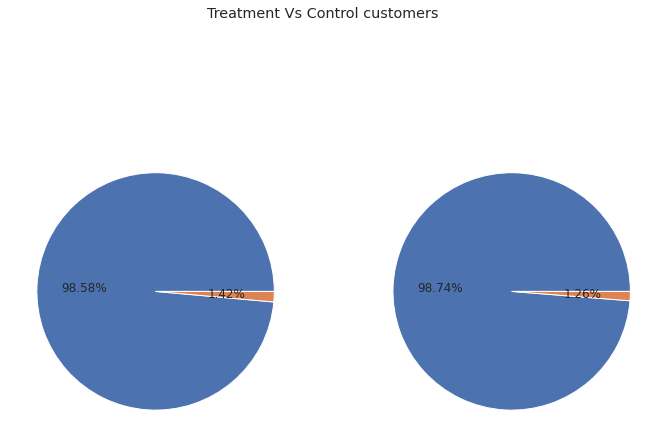

In [ ]:
print("-----Treatment-----")
print((treatment_customers.value_counts()/treatment_customers.size)*100)
print("-------------------")
print("-----Control-----")
print((control_customers.value_counts()/control_customers.size)*100)
print("-----------------")
fig, axs = plt.subplots(1, 2)
fig.suptitle('Treatment Vs Control customers')
axs[0].pie((treatment_customers.value_counts()/treatment_customers.size)*100, autopct="%.2f%%")
axs[1].pie((control_customers.value_counts()/treatment_customers.size)*100, autopct="%.2f%%")

In [ ]:
treatment.drop(['EmailAddress', 'FirstName', 'LastName', 'CASS_Address', 'CASS_ZIP', 'CLICK DATE'], axis=1, inplace=True)
control.drop(['EmailAddress', 'FirstName', 'LastName', 'CASS_Address', 'CASS_ZIP'], axis=1, inplace=True)


<BarContainer object of 51 artists>

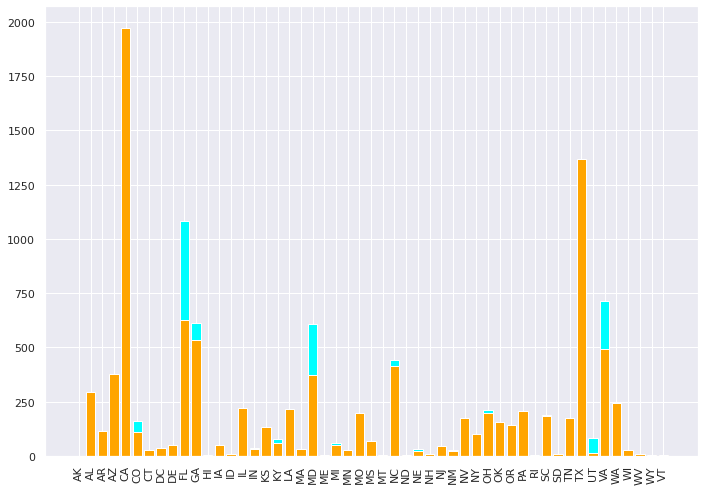

In [ ]:
plt.xticks(rotation=90)
plt.bar(treatment.groupby("CASS_State")["CASS_State"].size().index, treatment.groupby("CASS_State")["CASS_State"].size().values,  color='cyan')
plt.bar(control.groupby("CASS_State")["CASS_State"].size().index, control.groupby("CASS_State")["CASS_State"].size().values,  color='orange')


-----Treatment-----
  Renter  isCustomer     0  Percentage
0      N       False  9374   98.798482
1      N        True   114    1.201518
2      Y       False   494   94.636015
3      Y        True    28    5.363985
-------------------
-----Control------
  Renter  isCustomer     0  Percentage
0      N       False  9405   98.947922
1      N        True   100    1.052078
2      Y       False   489   94.951456
3      Y        True    26    5.048544
------------------


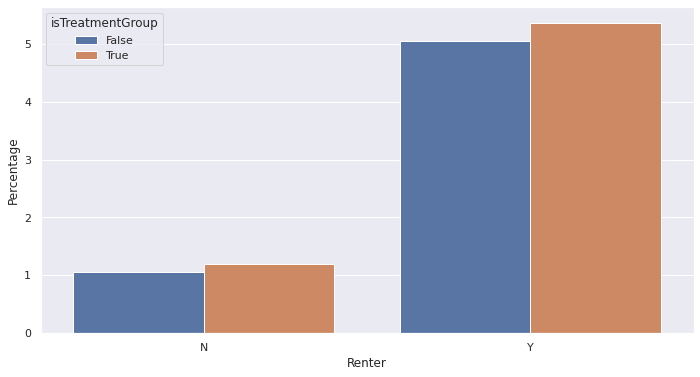

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["Renter", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("Renter")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["Renter"]]) * 100, axis=1)
print(df1)
print("-------------------")
print("-----Control------")
df2 = control.groupby(["Renter", "isCustomer"]).size().reset_index()
df_temp = df2.reset_index().groupby("Renter")[0].sum()
df2["Percentage"] = df2.apply(lambda x: (x[0] / df_temp[x["Renter"]]) * 100, axis=1)
print(df2)
print("------------------")
df1["isTreatmentGroup"] = True
df2["isTreatmentGroup"] = False
concat_df = pd.concat([df1, df2])
concat_df = concat_df[concat_df["isCustomer"]==True]
sns.barplot(data=concat_df, x="Renter", y="Percentage", hue="isTreatmentGroup")

-----Treatment-----
  Publisher  isCustomer     0  Percentage
0    Ae34ER       False  7819   98.488475
1    Ae34ER        True   120    1.511525
2    Ay4087       False  2049   98.937711
3    Ay4087        True    22    1.062289
-------------------
-----Control------
       Publisher  isCustomer     0  Percentage
0         Ae34ER       False  3224   98.865379
1         Ae34ER        True    37    1.134621
2  Ae34ER/Ay4087       False  3896   98.682877
3  Ae34ER/Ay4087        True    52    1.317123
4         Ay4087       False  2774   98.683742
5         Ay4087        True    37    1.316258
------------------


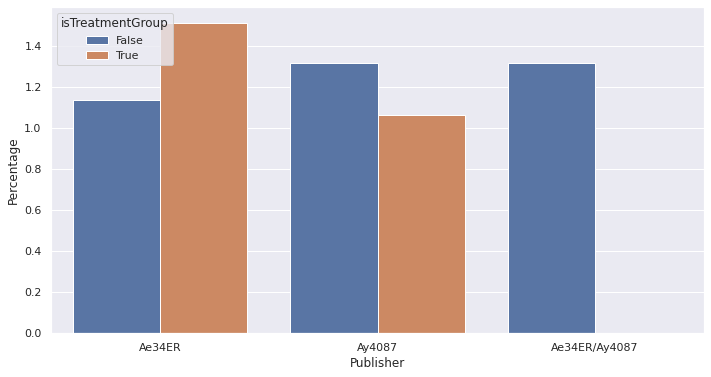

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["Publisher", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("Publisher")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["Publisher"]]) * 100, axis=1)
print(df1)
print("-------------------")
print("-----Control------")
df2 = control.groupby(["Publisher", "isCustomer"]).size().reset_index()
df_temp = df2.reset_index().groupby("Publisher")[0].sum()
df2["Percentage"] = df2.apply(lambda x: (x[0] / df_temp[x["Publisher"]]) * 100, axis=1)
print(df2)
print("------------------")
df1["isTreatmentGroup"] = True
df2["isTreatmentGroup"] = False
concat_df = pd.concat([df1, df2])
concat_df = concat_df[concat_df["isCustomer"]==True]
concat_df
sns.barplot(data=concat_df, x="Publisher", y="Percentage", hue="isTreatmentGroup")

-----Treatment-----
                          SUBJECT  isCustomer     0  Percentage
0   A Bearty Care Warranty can...       False   151   97.419355
1   A Bearty Care Warranty can...        True     4    2.580645
2   Bearty Care Warranty Cover...       False  1099   98.300537
3   Bearty Care Warranty Cover...        True    19    1.699463
4   Don't Get Stuck Footing th...       False   546   99.272727
5   Don't Get Stuck Footing th...        True     4    0.727273
6   Don't Let an Untimely Bill...       False   523   97.757009
7   Don't Let an Untimely Bill...        True    12    2.242991
8   Don'��t Risk It Get Covere...       False   168   98.245614
9   Don'��t Risk It Get Covere...        True     3    1.754386
10  Don’t Risk It — Get Covere...       False   418   99.523810
11  Don’t Risk It — Get Covere...        True     2    0.476190
12  Get Covered Against Costly...       False   827   97.638725
13  Get Covered Against Costly...        True    20    2.361275
14  Get Covered: Pro

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


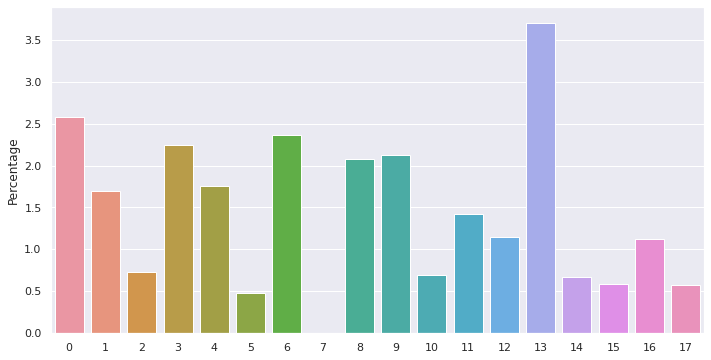

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["SUBJECT", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("SUBJECT")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["SUBJECT"]]) * 100, axis=1)
print(df1)
print("-------------------")
non_customer_data = df1[df1["isCustomer"]==False]
sns.barplot(np.arange(len(df1["SUBJECT"].unique())), 100 - non_customer_data["Percentage"])
print("------------Best SUBJECT----------")
print(df1["SUBJECT"].unique()[13])
print("----------------------------------")
print("------------Worst SUBJECT----------")
print(df1["SUBJECT"].unique()[7])
print("----------------------------------")

-----Treatment-----
                         CREATIVE  isCustomer     0  Percentage
0              London SpaBeauty01        True     1  100.000000
1   London SpaBeauty01-Q8-C3-M...       False  1318   99.097744
2   London SpaBeauty01-Q8-C3-M...        True    12    0.902256
3   London SpaBeauty01-Q8-C3-M...       False    47  100.000000
4   London SpaBeauty02-Q8-C3-M...       False  1396   98.587571
5   London SpaBeauty02-Q8-C3-M...        True    20    1.412429
6              London SpaBeauty03        True     3  100.000000
7   London SpaBeauty03-Q8-C3-M...       False  1401   99.010601
8   London SpaBeauty03-Q8-C3-M...        True    14    0.989399
9              London SpaBeauty04        True     1  100.000000
10  London SpaBeauty04-Q8-C3-M...       False   976   98.785425
11  London SpaBeauty04-Q8-C3-M...        True    12    1.214575
12  London SpaBeauty05-Q8-C3-M...       False  1176   98.906644
13  London SpaBeauty05-Q8-C3-M...        True    13    1.093356
14  London SpaBeauty

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


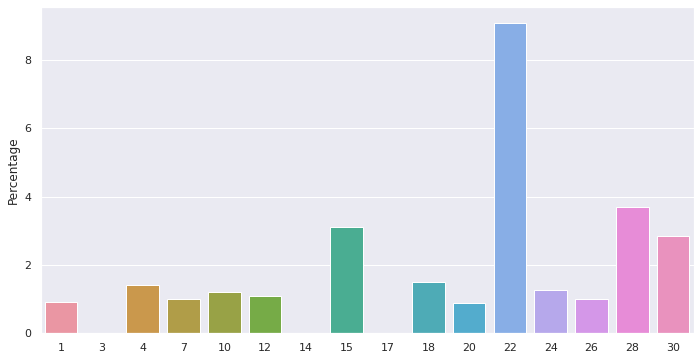

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["CREATIVE", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("CREATIVE")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["CREATIVE"]]) * 100, axis=1)
print(df1)
print("-------------------")
df1_ = df1[(df1['isCustomer'] == True) & (df1[0] >= 100.0)]
df1.drop(df1_.index, inplace=True)
non_customer_data = df1[df1["isCustomer"]==False]
sns.barplot(non_customer_data.index, 100 - non_customer_data["Percentage"])
print("------------Best Creative----------")
print(df1["CREATIVE"][22])
print("----------------------------------")

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["CASS_State", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("CASS_State")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["CASS_State"]]) * 100, axis=1)
print(df1)
print("-------------------")
print("-----Control-----")
df2 = control.groupby(["CASS_State", "isCustomer"]).size().reset_index()
df_temp = df2.reset_index().groupby("CASS_State")[0].sum()
df2["Percentage"] = df2.apply(lambda x: (x[0] / df_temp[x["CASS_State"]]) * 100, axis=1)
print(df1)
print("-------------------")
df1["isTreatmentGroup"] = True
df2["isTreatmentGroup"] = False
concat_df = pd.concat([df1, df2])
concat_df = concat_df[concat_df["isCustomer"]==True]
sns.barplot(data=concat_df, x="CASS_State", y="Percentage", hue="isTreatmentGroup")

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["EXEC DATE", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("EXEC DATE")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["EXEC DATE"]]) * 100, axis=1)
print(df1)
print("-------------------")
print("-----Control-----")
df1 = control.groupby(["Week", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("Week")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["Week"]]) * 100, axis=1)
print(df1)
print("-------------------")

-----Treatment-----
   EXEC DATE  isCustomer     0  Percentage
0   6/1/2020       False  1377   98.146828
1   6/1/2020        True    26    1.853172
2   6/2/2020       False  1464   99.186992
3   6/2/2020        True    12    0.813008
4   6/3/2020       False  1403   98.733286
5   6/3/2020        True    18    1.266714
6   6/4/2020       False  1352   98.327273
7   6/4/2020        True    23    1.672727
8   6/5/2020       False  1377   98.780488
9   6/5/2020        True    17    1.219512
10  6/6/2020       False  1465   98.388180
11  6/6/2020        True    24    1.611820
12  6/7/2020       False  1430   98.484848
13  6/7/2020        True    22    1.515152
-------------------
-----Control-----
  Week  isCustomer     0  Percentage
0   W1       False  5960   98.252555
1   W1        True   106    1.747445
2   W2       False  2164   99.631676
3   W2        True     8    0.368324
4   W3       False  1065   99.812559
5   W3        True     2    0.187441
6   W4       False   705   98.601399
7

-----Treatment-----
    DECILE  isCustomer     0  Percentage
0        1       False   106   99.065421
1        1        True     1    0.934579
2        2       False   228  100.000000
3        3       False   231  100.000000
4        4       False   315  100.000000
5        5       False   365  100.000000
6        6       False   847   99.647059
7        6        True     3    0.352941
8        7       False  1558   99.935856
9        7        True     1    0.064144
10       8       False  1879   99.893674
11       8        True     2    0.106326
12       9       False  1884   96.913580
13       9        True    60    3.086420
14      10       False  2455   97.035573
15      10        True    75    2.964427
-------------------
-----Control-----
    DECILE  isCustomer     0  Percentage
0        1       False   108  100.000000
1        2       False   219   98.648649
2        2        True     3    1.351351
3        3       False   201  100.000000
4        4       False   281   99.645390

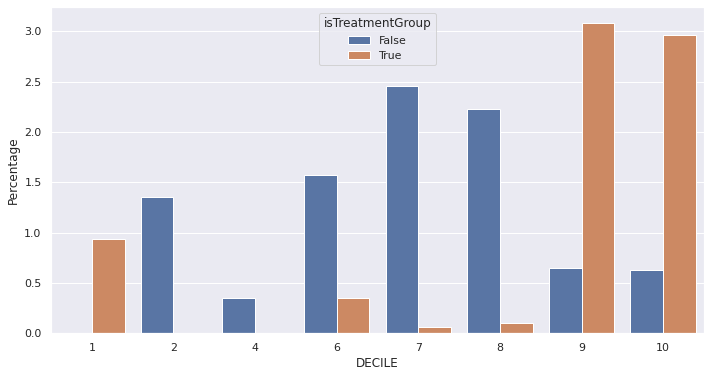

In [ ]:
print("-----Treatment-----")
df1 = treatment.groupby(["DECILE", "isCustomer"]).size().reset_index()
df_temp = df1.reset_index().groupby("DECILE")[0].sum()
df1["Percentage"] = df1.apply(lambda x: (x[0] / df_temp[x["DECILE"]]) * 100, axis=1)
print(df1)
print("-------------------")
print("-----Control-----")
df2 = control.groupby(["DECILE", "isCustomer"]).size().reset_index()
df_temp = df2.reset_index().groupby("DECILE")[0].sum()
df2["Percentage"] = df2.apply(lambda x: (x[0] / df_temp[x["DECILE"]]) * 100, axis=1)
print(df2)
print("-------------------")
df1["isTreatmentGroup"] = True
df2["isTreatmentGroup"] = False
concat_df = pd.concat([df1, df2])
concat_df = concat_df[concat_df["isCustomer"]==True]
sns.barplot(data=concat_df, x="DECILE", y="Percentage", hue="isTreatmentGroup")

Protect Your Systems & Appliances with a Bearty Care Warranty


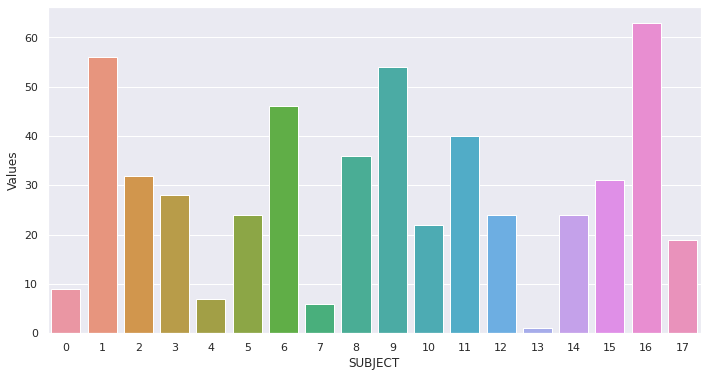

In [ ]:
df1 = treatment.groupby(["Renter", "SUBJECT"]).size()
df1 = df1.reset_index()
df1 = df1.rename(columns={0: 'Values'})
subject_array = df1["SUBJECT"].unique()
df1["SUBJECT"] = df1["SUBJECT"].apply(lambda x : np.where(subject_array == x)[0][0])
df1 = df1[df1["Renter"]=="Y"]
sns.barplot(data=df1, x="SUBJECT", y="Values")
print(subject_array[13])

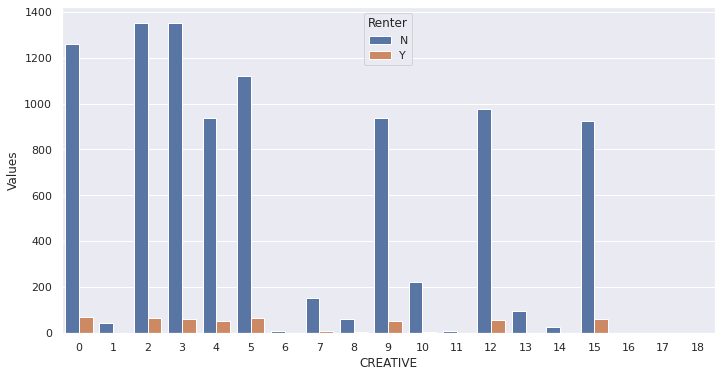

In [ ]:
df1 = treatment.groupby(["Renter", "CREATIVE"]).size()
df1 = df1.reset_index()
df1 = df1.rename(columns={0: 'Values'})
subject_array = df1["CREATIVE"].unique()
df1["CREATIVE"] = df1["CREATIVE"].apply(lambda x : np.where(subject_array == x)[0][0])
sns.barplot(data=df1, x="CREATIVE", y="Values", hue="Renter")

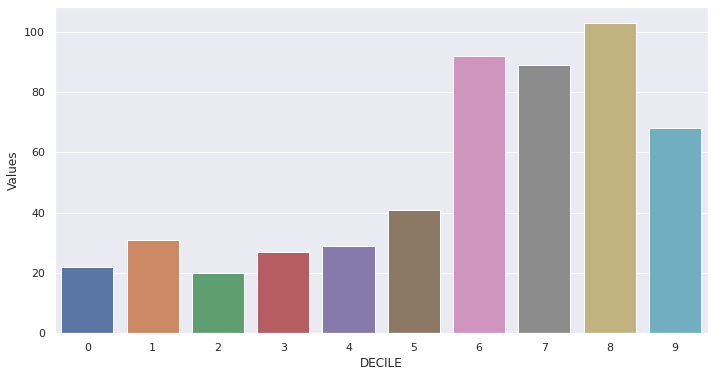

In [ ]:
df1 = treatment.groupby(["Renter", "DECILE"]).size()
df1 = df1.reset_index()
df1 = df1.rename(columns={0: 'Values'})
subject_array = df1["DECILE"].unique()
df1["DECILE"] = df1["DECILE"].apply(lambda x : np.where(subject_array == x)[0][0])
df1 = df1[df1["Renter"]=="Y"]
sns.barplot(data=df1, x="DECILE", y="Values")

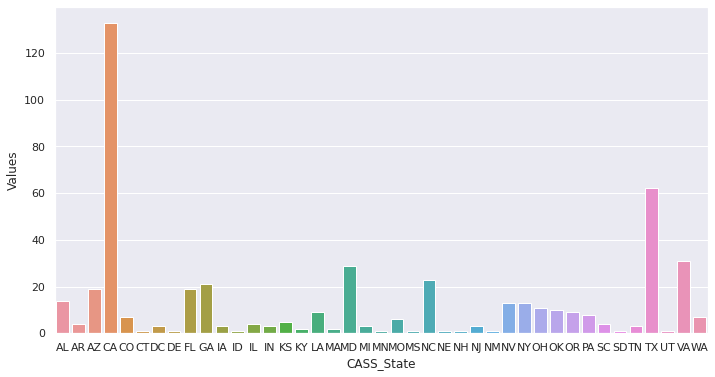

In [ ]:
df1 = control.groupby(["Renter", "CASS_State"]).size()
df1 = df1.reset_index()
df1 = df1.rename(columns={0: 'Values'})
df1 = df1[df1["Renter"]=="Y"]
sns.barplot(data=df1, x="CASS_State", y="Values")